In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_balanced_raw = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_balanced_raw.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Summary Statistics

In [3]:
diabetes_balanced_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
diabetes_balanced_raw.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
diabetes_balanced_raw.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

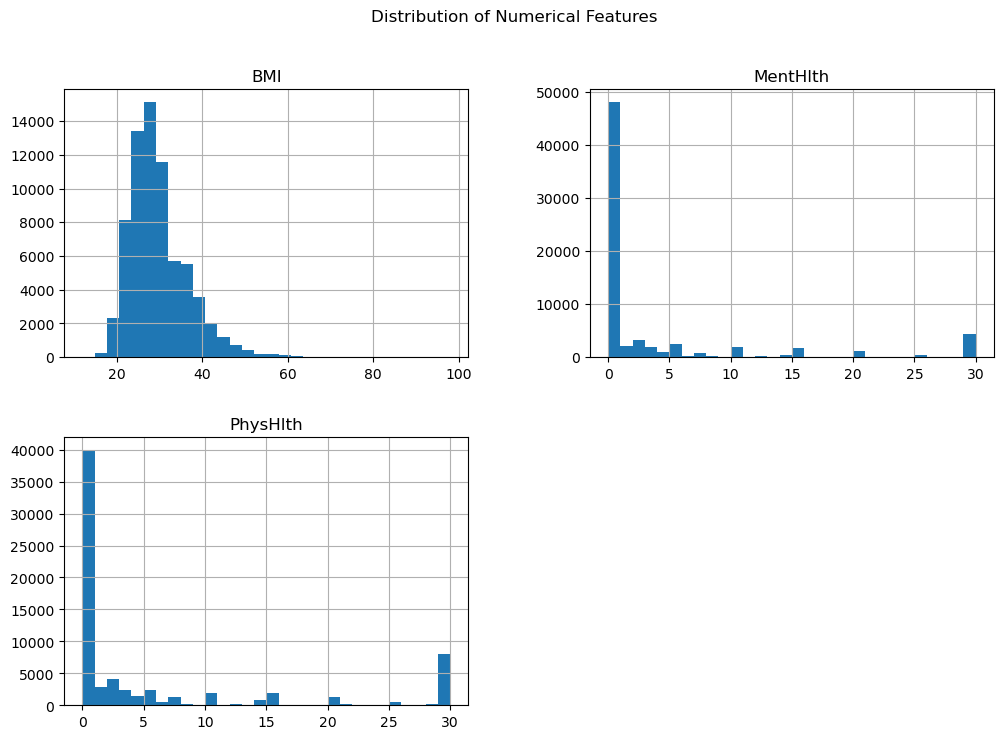

In [6]:
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
diabetes_balanced_raw[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

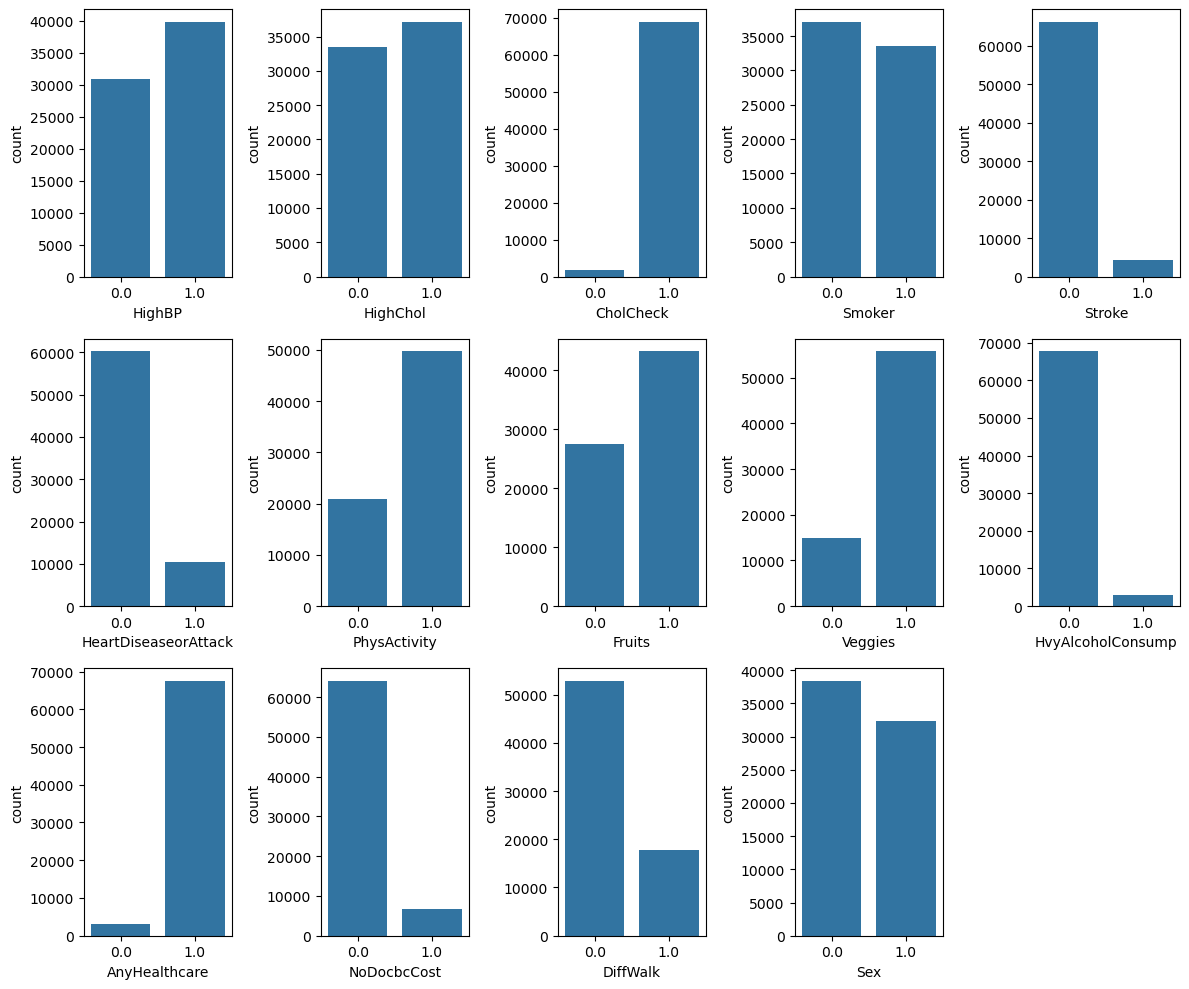

In [7]:
categorical_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
    'NoDocbcCost', 'DiffWalk', 'Sex'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 5, i)
    sns.countplot(x=col, data=diabetes_balanced_raw)
    
plt.tight_layout()
plt.show()

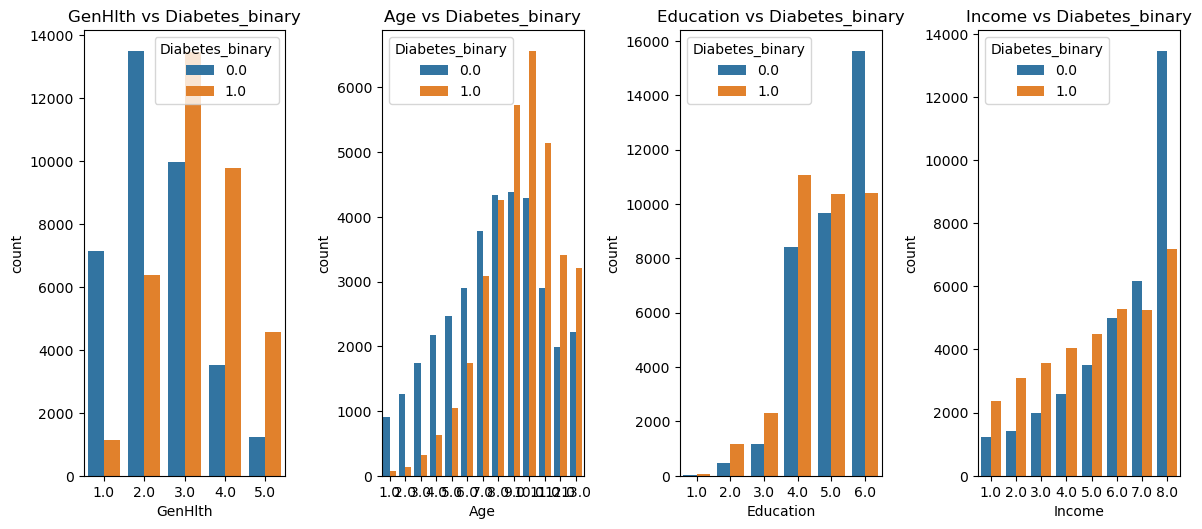

In [8]:
ordinal_columns = ['GenHlth', 'Age', 'Education', 'Income']

plt.figure(figsize=(12, 10))
for i, col in enumerate(ordinal_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, hue='Diabetes_binary', data=diabetes_balanced_raw)
    plt.title(f'{col} vs Diabetes_binary')
plt.tight_layout()
plt.show()

<Axes: >

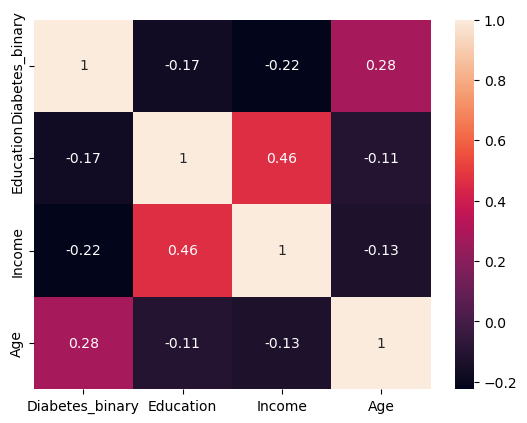

In [9]:
sns.heatmap(diabetes_balanced_raw[['Diabetes_binary', 'Education', 'Income', 'Age']].corr(), annot=True)

<Axes: >

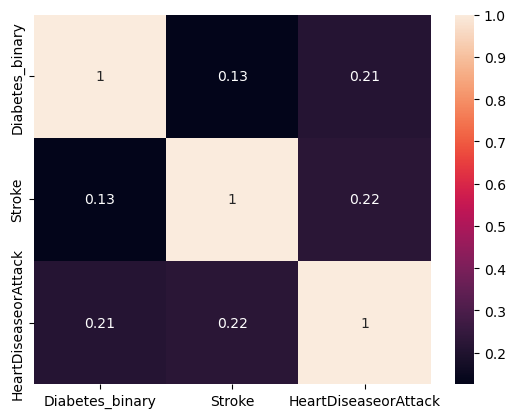

In [10]:
sns.heatmap(diabetes_balanced_raw[['Diabetes_binary', 'Stroke', 'HeartDiseaseorAttack']].corr(), annot=True)

In [11]:
print(" Skewness of 'BMI' :", diabetes_balanced_raw['BMI'].skew())
print(" Skewness of 'MentHlth' :", diabetes_balanced_raw['MentHlth'].skew())
print(" Skewness of 'PhysHlth' :", diabetes_balanced_raw['PhysHlth'].skew())


 Skewness of 'BMI' : 1.7191801918140364
 Skewness of 'MentHlth' : 2.388109639646643
 Skewness of 'PhysHlth' : 1.6573043998917887


### Pre Processing

In [12]:
def robust_scale(column):
    median = np.median(column)
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    return (column - median) / iqr

In [13]:
diabetes_processed = diabetes_balanced_raw.copy()

columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth']
for col in columns_to_scale:
    diabetes_processed[col + '_scaled'] = robust_scale(diabetes_processed[col])

diabetes_processed.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_scaled,MentHlth_scaled,PhysHlth_scaled
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311,0.107123,1.876019,0.968403
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196,0.889244,4.077813,1.677043
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-2.125000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,-0.500000,0.000000,0.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,8.625000,15.000000,5.000000


In [14]:
diabetes_processed['GenHlth'] = diabetes_processed['GenHlth'].apply(lambda x: 6 - x)

In [15]:
columns_to_drop = [
    'CholCheck',
    'Stroke',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'Education',
    'BMI',
    'MentHlth',
    'PhysHlth'
]

diabetes_processed = diabetes_processed.drop(columns = columns_to_drop)

In [16]:
diabetes_processed.head()

,Diabetes_binary,HighBP,HighChol,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,DiffWalk,Sex,Age,Income,BMI_scaled,MentHlth_scaled,PhysHlth_scaled
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,4.0,8.0,-0.375,2.5,5.000000
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,12.0,8.0,-0.375,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,1.0,13.0,8.0,-0.375,0.0,1.666667
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,11.0,8.0,-0.125,0.0,0.500000
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,8.0,8.0,0.000,0.0,0.000000


In [17]:
X = diabetes_processed.drop('Diabetes_binary', axis=1)
y = diabetes_processed['Diabetes_binary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=17
)